# Online Shopping Sales Data Analysis

Using pandas, a powerful Python library for data manipulation and analysis, to take a deep insight into the online shopping sales data.

## Preparation

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

Load 'online_shopping_sales.csv' file from your local source folder.

In [2]:
df = pd.read_csv('online_shopping_sales.csv', index_col=False)

Drop any NaN values if it exists. Then, show the top 5 rows using `head()`.

In [3]:
df.dropna(axis=0, how='any', inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## 1. Monthly Sales in 2019

First, cleaning the data that are mistakenly inserted into the 'Order Date' column. Then, add 'Month' column.

In [4]:
df = df[df['Order Date'].str[0:2] != 'Or']
df['Month'] = df['Order Date'].str[0:2].astype('int8') # get the substring of the column 'Order Date'

Add 'Sales' column by multiplying both 'Quantity Ordered' and 'Price Each' columns.

In [5]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

Applying `groupby()` function which has the same functionality as `GROUP BY` syntax in SQL to categorize each field in 'Month' column.

In [6]:
monthly_sales = df.groupby('Month').sum()['Sales']
print(monthly_sales)

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64


Using `matplotlib.pyplot.plt` library to visualize the analysis result.

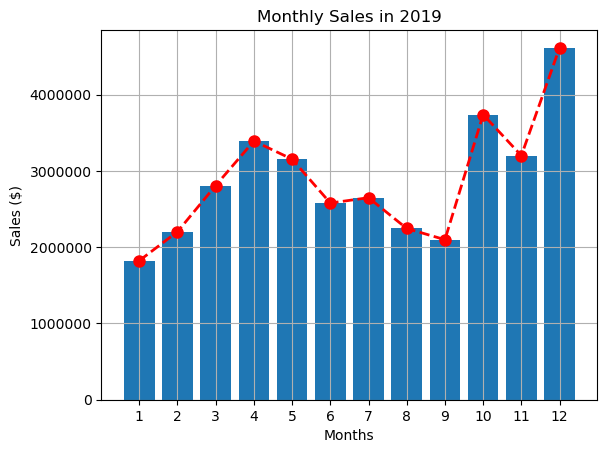

In [7]:
months = range(1, 13)
plt.bar(months, monthly_sales)
plt.plot(months, monthly_sales, color='red', marker='o', linestyle='--', linewidth=2, markersize=8)
plt.title('Monthly Sales in 2019')
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales ($)')
plt.ticklabel_format(style='plain') # disable scientific notation on the y-axis
plt.grid()
plt.show()

## 2. Sales by City in 2019

Add 'City' columns. In United States, there are some states that have same city names.

In [16]:
def get_city_and_state(address):
    city = address.split(',')[1][1:]
    state = address.split(',')[2].split(" ")[1]
    return city, state

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city_and_state(x)[0]}, {get_city_and_state(x)[1]}")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [17]:
sales_by_city = df.groupby('City').sum()['Sales']
print(sales_by_city)

City
Atlanta, GA          2.795499e+06
Austin, TX           1.819582e+06
Boston, MA           3.661642e+06
Dallas, TX           2.767975e+06
Los Angeles, CA      5.452571e+06
New York City, NY    4.664317e+06
Portland, ME         4.497583e+05
Portland, OR         1.870732e+06
San Francisco, CA    8.262204e+06
Seattle, WA          2.747755e+06
Name: Sales, dtype: float64


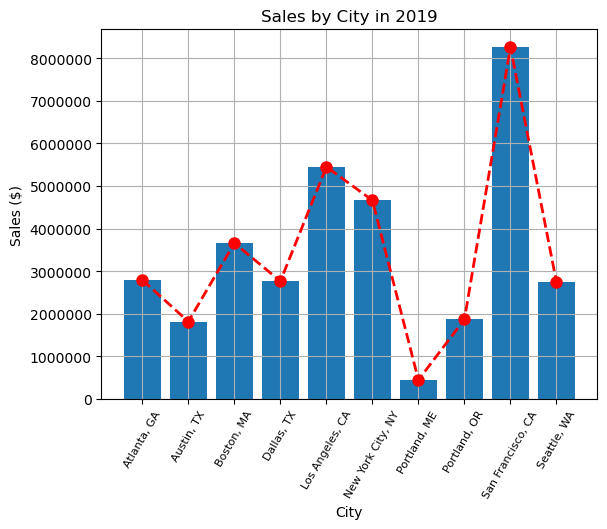

In [29]:
cities = [city for city, df in df.groupby('City')]
plt.bar(cities, sales_by_city)
plt.plot(cities, sales_by_city, color='red', marker='o', linestyle='--', linewidth=2, markersize=8)
plt.title('Sales by City in 2019')
plt.xticks(rotation=60, fontsize=8)
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.ticklabel_format(axis='y', style='plain')
plt.grid()
plt.show()

## 3. Frequent Shopping Hour

Use `pd.to_datetime()` to convert data from string object to **datetime** object in 'Order Date' column, and add 'Hour' column.

In [36]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9


In [42]:
orders = df.groupby('Hour').count()['Product']
print(orders)

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Product, dtype: int64


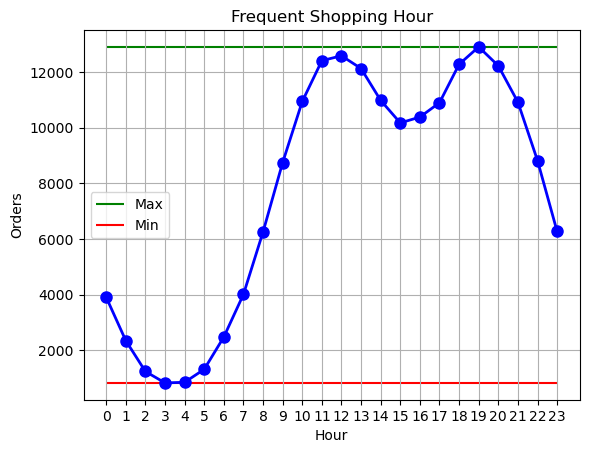

In [52]:
hours = [hour for hour, df in df.groupby('Hour')]
orders = df.groupby('Hour').count()['Product']
plt.plot(hours, orders, color='blue', marker='o', linewidth=2, markersize=8)
plt.xticks(hours)
plt.title('Frequent Shopping Hour')
plt.xlabel('Hour')
plt.ylabel('Orders')
plt.hlines(max(orders), xmin=0, xmax=23, color='green', zorder=1, label='Max')
plt.hlines(min(orders), xmin=0, xmax=23, color='red', zorder=1, label='Min')
plt.grid()
plt.legend(loc='center left')
plt.show()

**Insight**: The above plot illustates that customers are purchasing their products mostly at 12pm and 7pm. So, companies are optimal to advertise their products on the online shopping website at around 12 and 19 to maximize their sales. On the other hand, online shopping website company can charge more advertisement fee to sellers on the peak time period, since a lot of sellers are willing to spend more money to get that position.

## 4. Products that are Most Likely to Purchase Together

Find same (duplicated) 'Order ID' data in 'Order ID' column. It implies that those products are purchased together.

In [55]:
duplicated_orders = df[df.duplicated(subset=['Order ID'], keep=False)]

Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

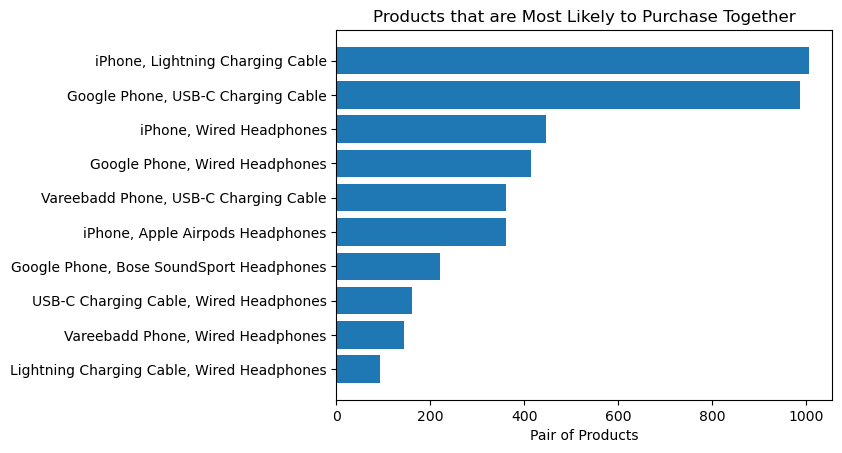

In [80]:
count = Counter()
orders = duplicated_orders.groupby(['Order ID'])['Product'].apply(','.join).reset_index()

for order in orders['Product']:
    products = order.split(',')
    count.update(Counter(combinations(products, 2))) 
    # find combination of two products purchased together and count its frequency

pairs = []
counts = []
for products, num in count.most_common(10):
    pairs.append(products[0] + ', ' + products[1])
    counts.append(num)

plt.barh(pairs[::-1], counts[::-1])
plt.title('Products that are Most Likely to Purchase Together')
plt.xlabel('Pair of Products')
plt.show()

## 5. Relationship Between Product Price and Quantity Orders

In [81]:
quantities = df.groupby(['Product']).sum()['Quantity Ordered']
products = [product for product, df in df.groupby(['Product'])]

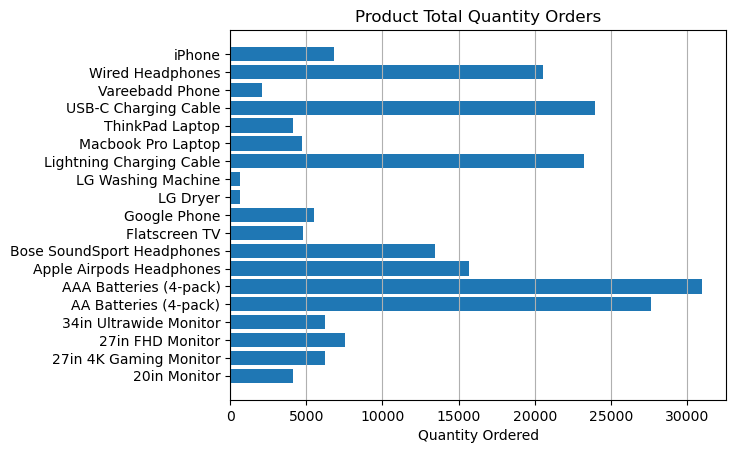

In [93]:
plt.barh(products, quantities)
plt.title("Product Total Quantity Orders")
plt.xlabel('Quantity Ordered')
plt.grid(axis='x')
plt.show()

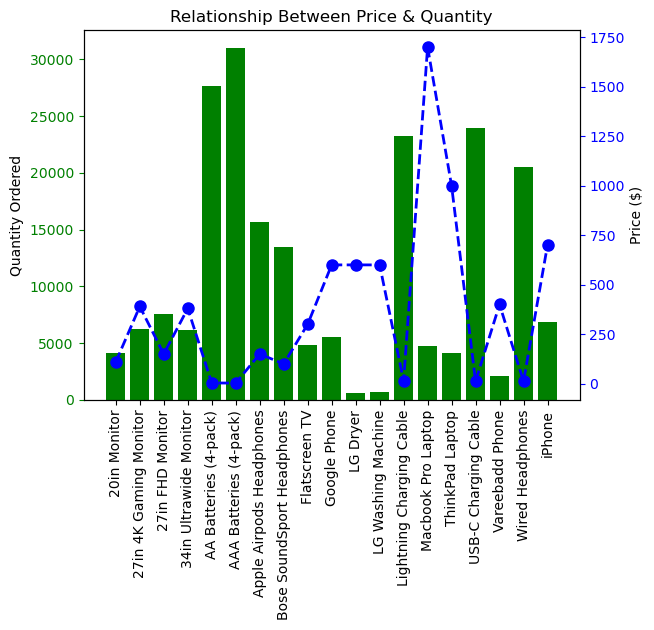

In [101]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Relationship Between Price & Quantity')
ax1.bar(products, quantities, color='green')
ax1.set_ylabel('Quantity Ordered')
ax1.tick_params(axis='y', colors='green')
ax1.tick_params(axis='x', labelrotation=90)

ax2.plot(products, prices, color='blue', marker='o', linestyle='--', linewidth=2, markersize=8)
ax2.set_ylabel('Price ($)')
ax2.tick_params(axis='y', colors='blue')

plt.show()